In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('dataset/creditcard.csv')[:80_000]
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values

In [5]:
print(f'Shapes of X, y = {X.shape}, {y.shape}')
print(f'#Fraud Cases = {y.sum()}')

Shapes of X, y = (80000, 28), (80000,)
#Fraud Cases = 196


In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1_000)
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [17]:
model.predict(X).sum()

151

# Class Weight

In [18]:
model = LogisticRegression(class_weight={0:1, 1:2}, max_iter=1_000)
model.fit(X,y).predict(X).sum()

171

In [19]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1_000),
    param_grid={'class_weight': [{0:1, 1:v} for v in range(1, 4)]},
    cv=10, 
    n_jobs=-1
)

In [20]:
grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [21]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,3.655691,0.405497,0.004600,0.002858,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.998500,0.997250,0.998125,0.998750,0.998375,0.9995,0.999750,0.998375,0.997500,0.998500,0.998463,0.000731,3
1,3.559392,0.406982,0.004969,0.005931,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.998625,0.997250,0.998125,0.999625,0.998375,0.9995,0.999875,0.998500,0.998125,0.998750,0.998675,0.000761,2
2,3.162384,0.424557,0.002304,0.002998,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.999250,0.997125,0.998125,0.999625,0.998500,0.9995,0.999875,0.998500,0.998125,0.999125,0.998775,0.000808,1


# Score Metric

In [23]:
lr = LogisticRegression()
lr.score

<bound method ClassifierMixin.score of LogisticRegression()>

In [24]:
??lr.score

Signature: lr.score(X, y, sample_weight=None)
Source:   
    def score(self, X, y, sample_weight=None):
        """
        Return the mean accuracy on the given test data and labels.

        In multi-label classification, this is the subset accuracy
        which is a harsh metric since you require for each sample that
        each label set be correctly predicted.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.

        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            True labels for `X`.

        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights.

        Returns
        -------
        score : float
            Mean accuracy of ``self.predict(X)`` wrt. `y`.
        """
        from .metrics import accuracy_score
        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
File:      c:\users\farooq khan\desktop\dev\sklearn-dat

In [25]:
from sklearn.metrics import precision_score, recall_score

In [29]:
print(f'Precision: {precision_score(y, grid.predict(X))}, Recall: {recall_score(y, grid.predict(X))}')

Precision: 0.8055555555555556, Recall: 0.7397959183673469


- Precision asks, give that I predicted fraud, how accurate am I?
- Recall asks, did I get all the fraud cases?

In [37]:
from sklearn.metrics import make_scorer
grid_metric = GridSearchCV(
    estimator=LogisticRegression(max_iter=1_000),
    param_grid={'class_weight': [{0:1, 1:v} for v in np.linspace(1,20,30)]},
    scoring={'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score)},
    refit='precision', # optimize over precision
    cv=10, 
    return_train_score = True, 
    n_jobs=-1
)

In [38]:
grid_metric.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724

In [48]:
pd.DataFrame(grid_metric.cv_results_).tail()#.to_csv('results/grid_search_cv_linear_regression_precision_recall.csv', index=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall,split3_train_recall,split4_train_recall,split5_train_recall,split6_train_recall,split7_train_recall,split8_train_recall,split9_train_recall,mean_train_recall,std_train_recall
25,2.912173,0.442908,0.020079,0.005053,"{0: 1, 1: 17.379310344827587}","{'class_weight': {0: 1, 1: 17.379310344827587}}",0.782609,0.380000,0.555556,0.947368,...,0.881356,0.864407,0.875,0.863636,0.852273,0.869318,0.886364,0.875,0.869617,0.009789
26,3.361750,0.490835,0.015952,0.003717,"{0: 1, 1: 18.03448275862069}","{'class_weight': {0: 1, 1: 18.03448275862069}}",0.782609,0.365385,0.535714,0.947368,...,0.881356,0.864407,0.875,0.863636,0.852273,0.869318,0.892045,0.875,0.870185,0.010851
27,3.266036,0.294932,0.016545,0.003831,"{0: 1, 1: 18.689655172413794}","{'class_weight': {0: 1, 1: 18.689655172413794}}",0.782609,0.345455,0.535714,0.947368,...,0.881356,0.864407,0.875,0.875000,0.857955,0.869318,0.897727,0.875,0.872458,0.011025
28,3.349838,0.414099,0.018365,0.006899,"{0: 1, 1: 19.344827586206897}","{'class_weight': {0: 1, 1: 19.344827586206897}}",0.782609,0.345455,0.535714,0.947368,...,0.881356,0.864407,0.875,0.875000,0.857955,0.869318,0.897727,0.875,0.872458,0.011025
29,2.930055,0.366691,0.013692,0.003605,"{0: 1, 1: 20.0}","{'class_weight': {0: 1, 1: 20.0}}",0.782609,0.339286,0.535714,0.947368,...,0.881356,0.864407,0.875,0.875000,0.857955,0.869318,0.897727,0.875,0.873588,0.010104


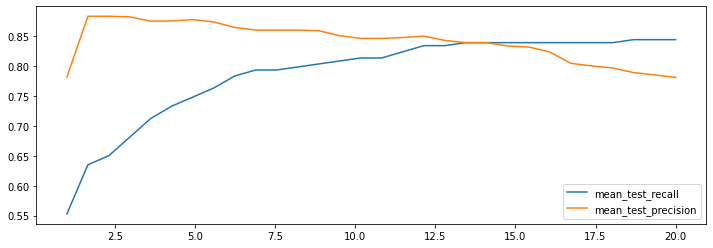

In [43]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid_metric.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']], df[score],label=score)
plt.legend()

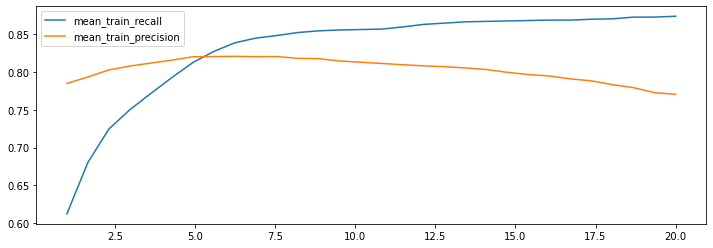

In [44]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid_metric.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']], df[score],label=score)
plt.legend()

# Custom Optimzation Metric

In [45]:
def min_recall_precision(y_true, y_pred):
    r = recall_score(y_true, y_pred)
    p = precision_score(y_true, y_pred)
    return min(r,p)

In [46]:
grid_custom_metric = GridSearchCV(
    estimator=LogisticRegression(max_iter=1_000),
    param_grid={'class_weight': [{0:1, 1:v} for v in np.linspace(1,20,30)]},
    scoring={'precision': make_scorer(precision_score), 
             'recall': make_scorer(recall_score),
            'min_both': make_scorer(min_recall_precision)
            },
    refit='min_both', # optimize over precision
    cv=10, 
    return_train_score = True, 
    n_jobs=-1
)

In [47]:
grid_custom_metric.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034

In [59]:
pd.DataFrame(grid_custom_metric.cv_results_)#.to_csv('results/grid_search_cv_linear_regression_precision_recall_custom.csv', index=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_min_both,split3_train_min_both,split4_train_min_both,split5_train_min_both,split6_train_min_both,split7_train_min_both,split8_train_min_both,split9_train_min_both,mean_train_min_both,std_train_min_both
0,3.662320,0.393636,0.030820,0.003810,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,3.436575,0.308065,0.031221,0.003027,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.000000,0.463415,0.583333,1.000000,...,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286
2,3.385084,0.364955,0.028762,0.003487,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.000000,0.463415,0.583333,1.000000,...,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881
3,3.450210,0.381423,0.031897,0.005792,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.000000,0.452381,0.583333,1.000000,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
4,2.963645,0.539926,0.035910,0.006523,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.000000,0.452381,0.583333,1.000000,...,0.824859,0.740113,0.755682,0.744318,0.727273,0.778409,0.784091,0.761364,0.771498,0.037959
5,3.161516,0.658064,0.035987,0.009573,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",1.000000,0.452381,0.583333,1.000000,...,0.841808,0.768362,0.778409,0.789773,0.772727,0.789773,0.795455,0.772727,0.792485,0.029289
6,3.255900,0.377788,0.033305,0.003305,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.802260,0.789773,0.813559,0.801136,0.801136,0.804469,0.789773,0.810493,0.020970
7,2.948571,0.382822,0.031258,0.006329,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.804469,0.802198,0.811111,0.798883,0.806818,0.807692,0.804469,0.815197,0.020943
8,3.149057,0.416955,0.030253,0.004830,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.944444,0.452381,0.583333,0.947368,...,0.837989,0.806630,0.805405,0.812155,0.801105,0.811111,0.807487,0.806630,0.816403,0.018628
9,3.179334,0.483387,0.033972,0.008735,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.944444,0.452381,0.583333,0.947368,...,0.838889,0.807692,0.805405,0.812155,0.802198,0.812155,0.808511,0.809783,0.817098,0.018411


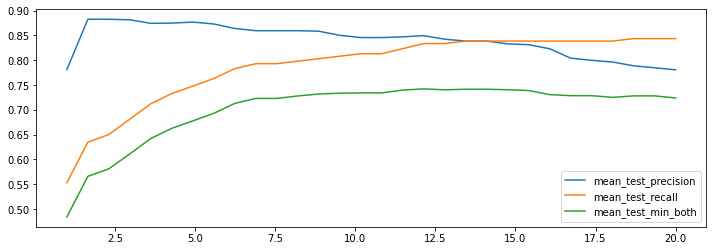

In [60]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid_custom_metric.cv_results_)
for score in ['mean_test_precision', 'mean_test_recall', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df['param_class_weight']], df[score],label=score)
plt.legend()